# Endangered Languages Exploration
## by Jean Pierre Simons Rondona

## Preliminary Wrangling

This dataset was published by The Guardian (<a href='https://www.theguardian.com/news/datablog/2011/apr/15/language-extinct-endangered#data'>here</a>). It aims to provide data insights on how many endangered languages there are in the World and what are the chances they will die out completely.

UNESCO provide a classification system to show just how 'in trouble' the language is:

* Vulnerable - most children speak the language, but it may be restricted to certain domains (e.g., home)
* Definitely endangered - children no longer learn the language as a 'mother tongue' in the home
* Severely endangered - language is spoken by grandparents and older generations; while the parent generation may understand it, they do not speak it to children or among themselves
* Critically endangered - the youngest speakers are grandparents and older, and they speak the language partially and infrequently
* Extinct - there are no speakers left

In addition, I also included information on World Population by country from Worldometer via Kaggle (<a href='https://www.kaggle.com/tanuprabhu/population-by-country-2020'>here</a>).

In the study below I intend to answer the following questions:
* Do the amount of speakers directly correlate to a languages likelihood of extinction?
* Does a language's world location impact it's likelihood of extinction?
* If a language is spoken in multiple countries does it impact it increase it's likelihood of extinction?

In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [32]:
# Load endangered languages data.
end_lang = pd.read_csv('data.csv')
end_lang.head(10)

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...
5,405,Romani,romani,romaní,"Albania, Germany, Austria, Belarus, Bosnia and...","ALB, DEU, AUT, BRB, BIH, BGR, HRV, EST, FIN, F...","rmc, rmf, rml, rmn, rmo, rmw, rmy",Definitely endangered,"sinti, vlax, calò",NaN,3500000.0,Yaron Matras: Romani: a linguistic introductio...,46.3165,22.3681,"many European countries, most densely in East-..."
6,2211,Yiddish (Israel),yiddish (Israël),yiddish (Israel),Israel,ISR,ydd,Definitely endangered,Judeo-German,NaN,3000000.0,Neil G. Jacobs: Yiddish: a linguistic introduc...,32.0833,34.8333,"most speakers now live outside Europe, mainly ..."
7,1586,Gondi,gondi,gondí,India,IND,gon,Vulnerable,Gondi; Gaudi; Gondiva; Gondwadi; Goondile; Gou...,NaN,2713790.0,NaN,19.5804,80.4418,"Madhya Pradesh (Betul, Chhindwara, Seoni, Mand..."
8,1020,Limburgian-Ripuarian,francique ripuaire -limbourgeois,limburgués-ripuarino,"Germany, Belgium, Netherlands","DEU, BEL, NLD","ksh, lim",Vulnerable,Colognian (dialect; in German: Kölsch),NaN,2600000.0,NaN,50.7781,6.0864,Limburg provinces in Belgium and the Netherlan...
9,1943,Quechua of Southern Bolivia,quechua bolivien du sud,quechua boliviano meridional,Bolivia (Plurinational State of),BOL,quh,Vulnerable,NaN,NaN,2300000.0,NaN,-18.0675,-65.7641,"Departments of Cochabamba, Chuquisaca, Potosí ..."


In [33]:
# Load the world population
pop = pd.read_csv('population_by_country_2020.csv')
pop.head(10)

,Country (or dependency),Country Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331341050,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,274021604,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,221612785,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
5,Brazil,212821986,0.72%,1509890,25,8358140,21200.0,1.7,33,88%,2.73%
6,Nigeria,206984347,2.58%,5175990,226,910770,-60000.0,5.4,18,52%,2.64%
7,Bangladesh,164972348,1.01%,1643222,1265,130170,-369501.0,2.1,28,39%,2.11%
8,Russia,145945524,0.04%,62206,9,16376870,182456.0,1.8,40,74%,1.87%
9,Mexico,129166028,1.06%,1357224,66,1943950,-60000.0,2.1,29,84%,1.65%


In [34]:
end_lang.describe()

,ID,Number of speakers,Latitude,Longitude
count,2722.000000,2.539000e+03,2719.000000,2719.000000
mean,1362.501102,5.365890e+04,16.247853,22.266012
std,785.919949,3.114620e+05,23.241828,92.611293
min,2.000000,0.000000e+00,-55.002800,-174.197800
25%,682.250000,5.000000e+01,-2.705000,-69.180850
50%,1362.500000,8.000000e+02,15.658700,30.591400
75%,2042.750000,6.872000e+03,34.214050,102.366000
max,2724.000000,7.500000e+06,77.481500,179.187000


In [35]:
# Drop the columns that are not in English
end_lang = end_lang.drop(['Name in French','Name in Spanish','Alternate names', 'Name in the language'], axis=1)
# Drop redunant columns
end_lang = end_lang.drop(['Country codes alpha 3','ISO639-3 codes'], axis=1)

In [36]:
end_lang[end_lang['ID'].duplicated()]['ID'].count

<bound method Series.count of Series([], Name: ID, dtype: int64)>

In [37]:
# Split the Countries and Description of the location cell values into multiple rows
end_lang.head()

,ID,Name in English,Countries,Degree of endangerment,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,Italy,Vulnerable,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...",Vulnerable,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...",Vulnerable,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,"Italy, Switzerland",Definitely endangered,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...


In [38]:
#Split & explode countries
end_lang['Countries'] = end_lang['Countries'].str.split(',')
end_lang = end_lang.explode('Countries')
#Split & explode Desription of the location
end_lang['Description of the location'] = end_lang['Description of the location'].str.split(',')
end_lang = end_lang.explode('Description of the location')

In [39]:
# Join the world population data with our main data set.
end_lang = end_lang.merge(pop, left_on='Countries', right_on='Country (or dependency)')

In [40]:
end_lang.head(100)

,ID,Name in English,Countries,Degree of endangerment,Number of speakers,Sources,Latitude,Longitude,Description of the location,Country (or dependency),Country Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,Campania,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
1,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,Lucania (Basilicata),Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
2,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,Abruzzi (Abruzzo),Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
3,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,Molise,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
4,1022,South Italian,Italy,Vulnerable,7500000.0,NaN,40.9798,15.2490,northern Calabria,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1596,East Franconian,Germany,Vulnerable,NaN,http://vmf.i-iter.org/,50.0571,10.7336,Germany; formerly also in a small area north ...,Germany,83830972,0.32%,266897,240,348560,543822.0,1.6,46,76%,1.07%
96,1596,East Franconian,Germany,Vulnerable,NaN,http://vmf.i-iter.org/,50.0571,10.7336,Czech Republic; both the region and the class...,Germany,83830972,0.32%,266897,240,348560,543822.0,1.6,46,76%,1.07%
97,1478,Rhenish Franconian,Germany,Vulnerable,NaN,NaN,49.4467,8.2067,most parts of Rhineland-Palatinate and Hesse,Germany,83830972,0.32%,266897,240,348560,543822.0,1.6,46,76%,1.07%
98,1478,Rhenish Franconian,Germany,Vulnerable,NaN,NaN,49.4467,8.2067,the east and south of Saarland,Germany,83830972,0.32%,266897,240,348560,543822.0,1.6,46,76%,1.07%


In [41]:
# Remove records where the number of speakers is not specified since we are not interested in those.
# Number of records with null "Number of speakers"
end_lang[end_lang['Number of speakers'].isnull()]['ID'].count()

263

In [42]:
end_lang = end_lang[end_lang['Number of speakers'].notnull()]
# Verify all those records were removed
end_lang[end_lang['Number of speakers'].isnull()]['ID'].count()

0

In [43]:
#Modify "Number of speakers" to integer
end_lang.astype({'Number of speakers': 'int32'})

,ID,Name in English,Countries,Degree of endangerment,Number of speakers,Sources,Latitude,Longitude,Description of the location,Country (or dependency),Country Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,Campania,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
1,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,Lucania (Basilicata),Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
2,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,Abruzzi (Abruzzo),Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
3,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,Molise,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
4,1022,South Italian,Italy,Vulnerable,7500000,NaN,40.9798,15.2490,northern Calabria,Italy,60446035,-0.15%,-88249,206,294140,148943.0,1.3,47,69%,0.78%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,1315,Bom,Sierra Leone,Severely endangered,20,Tucker Childs,7.3188,-11.9915,NaN,Sierra Leone,8004158,2.10%,163768,111,72180,-4200.0,4.3,19,43%,0.10%
4246,1316,Kim,Sierra Leone,Critically endangered,20,Tucker Childs,7.2425,-11.9476,NaN,Sierra Leone,8004158,2.10%,163768,111,72180,-4200.0,4.3,19,43%,0.10%
4247,1295,Mo-peng,Sierra Leone,Extinct,0,Tucker Childs,7.4714,-12.2607,NaN,Sierra Leone,8004158,2.10%,163768,111,72180,-4200.0,4.3,19,43%,0.10%
4248,1314,Sei,Sierra Leone,Extinct,0,Tucker Childs,7.5857,-12.5354,NaN,Sierra Leone,8004158,2.10%,163768,111,72180,-4200.0,4.3,19,43%,0.10%


In [44]:
end_lang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3994 non-null   int64  
 1   Name in English              3994 non-null   object 
 2   Countries                    3994 non-null   object 
 3   Degree of endangerment       3994 non-null   object 
 4   Number of speakers           3994 non-null   float64
 5   Sources                      3110 non-null   object 
 6   Latitude                     3989 non-null   float64
 7   Longitude                    3989 non-null   float64
 8   Description of the location  3357 non-null   object 
 9   Country (or dependency)      3994 non-null   object 
 10  Country Population (2020)    3994 non-null   int64  
 11  Yearly Change                3994 non-null   object 
 12  Net Change                   3994 non-null   int64  
 13  Density (P/Km²)   

In [45]:
end_lang.describe()

,ID,Number of speakers,Latitude,Longitude,Country Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,3994.000000,3.994000e+03,3989.000000,3989.000000,3.994000e+03,3.994000e+03,3994.000000,3.994000e+03,3981.000000
mean,1335.530796,1.088145e+05,14.102519,19.337673,2.779428e+08,2.332879e+06,121.401602,2.566033e+06,-56711.102738
std,735.317411,4.749976e+05,21.332756,85.273909,4.783391e+08,3.919884e+06,147.785086,3.102428e+06,196690.930544
min,2.000000,0.000000e+00,-55.002800,-171.820600,1.360000e+03,-3.838400e+05,2.000000,1.000000e+01,-532687.000000
25%,718.000000,2.000000e+02,-3.184300,-69.500000,1.797138e+07,1.709150e+05,25.000000,3.095000e+05,-60000.000000
50%,1287.500000,2.100000e+03,15.691700,22.243100,5.097625e+07,6.550840e+05,66.000000,1.280000e+06,-800.000000
75%,1866.750000,2.861500e+04,27.926400,93.235400,2.128220e+08,1.509890e+06,153.000000,2.973190e+06,36400.000000
max,2722.000000,7.500000e+06,69.533300,179.187000,1.440298e+09,1.358663e+07,1265.000000,9.388211e+06,543822.000000


### What is the structure of your dataset?

> There are 2722 different endangered languages in this dataset with 7 features (name, countries, degree of endangerment, # of speakers, sources, latitude, longitude, description of the location). There are both categorical and numerical variables with one key ordered variable, endangerment:

> Less Critical -> Most Critical
> * Vulnerable - most children speak the language, but it may be restricted to certain domains (e.g., home)
> * Definitely endangered - children no longer learn the language as a 'mother tongue' in the home
> * Severely endangered - language is spoken by grandparents and older generations; while the parent generation may understand it, they do not speak it to children or among themselves
> * Critically endangered - the youngest speakers are grandparents and older, and they speak the language partially and infrequently
> * Extinct - there are no speakers left

### What is/are the main feature(s) of interest in your dataset?

> The key areas of interest are the factors that yield the degree of endangerement of a language.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the countries population demographics, total number of remaining speakers along with the location to be the main factors correlated to a critically endangered language.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

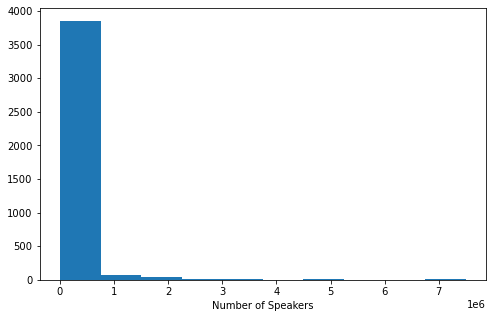

In [46]:
# First let's look at a standard histogram of the number of speakers variable.
plt.figure(figsize=[8,5])
plt.hist(data = end_lang, x = 'Number of speakers')
plt.xlabel('Number of Speakers')
plt.show()


In [47]:
# Let's try a logarithmic distribution to see if we can get more insights
np.log10(end_lang['Number of speakers'].describe())

C:\Users\JPSIMONS\anaconda3\envs\my_env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    3.601408
mean     5.036687
std      5.676691
min          -inf
25%      2.301030
50%      3.322219
75%      4.456594
max      6.875061
Name: Number of speakers, dtype: float64

In [48]:
# There are some languages where the # of speakers = 0.
# let's exclude them from the data set for now to see achieve a logarithmic distribution.
# New dataset for non extinct languages.
non_extinct = end_lang[end_lang['Number of speakers'] > 0]

In [49]:
np.log10(non_extinct['Number of speakers'].describe())

count    3.574147
mean     5.063948
std      5.689586
min      0.000000
25%      2.544068
50%      3.477121
75%      4.477121
max      6.875061
Name: Number of speakers, dtype: float64

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

Text(0.5, 0, 'Number of Speakers')

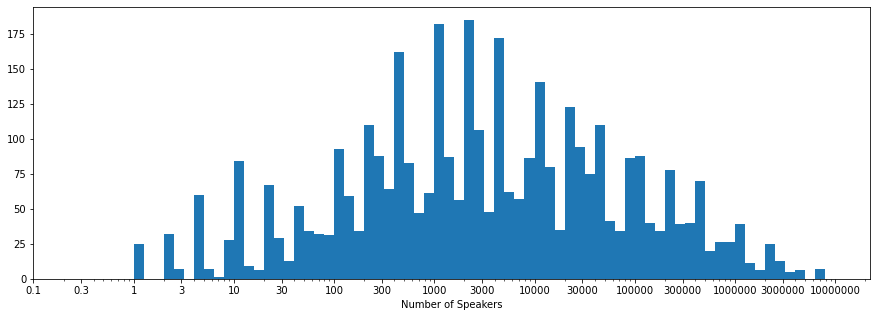

In [50]:
plt.figure(figsize=[15,5])
# Set bin size. The min is set to 0 since we don't need to take into account extinct languages
bins = 10 ** np.arange(0, 7+0.1, 0.1)
# Modify the ticks to make the x-axis more readable
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000,3000,10000,30000, 100000, 300000, 1000000, 3000000, 10000000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = non_extinct, x = 'Number of speakers', bins=bins);
# Apply  a logarithmic axis scale
plt.xscale('log')
# Apply the ticks we defined to our plot
plt.xticks(ticks,labels);
# Apply x-axis label
plt.xlabel('Number of Speakers')

In [51]:
# Now let's go back and see how many were extinct
end_lang[end_lang['Number of speakers'] == 0]['ID'].count()


243

As you can see above, a standard plot was very right skewed so I opted to create a logarithmic distribution instead. You will notice that there were several languages (243) that had 0 speakers (i.e they were technically extinct). I removed these records since they would impact the logarithmic distribution. Once that was done, you can see that most endangered languages have a range of 1000 - 3000 speakers.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Now we want to determine any correlations between the degree of endangerment and number speakers.

In [52]:
#Let's make the "Degree of endangerment" column categorical in order to for them to appear in degree of criticality
end_lang['Degree of endangerment']


0                  Vulnerable
1                  Vulnerable
2                  Vulnerable
3                  Vulnerable
4                  Vulnerable
                ...          
4245      Severely endangered
4246    Critically endangered
4247                  Extinct
4248                  Extinct
4249                  Extinct
Name: Degree of endangerment, Length: 3994, dtype: object

In [53]:
end_cats = ['Vulnerable','Definitely endangered','Severely endangered','Critically endangered','Extinct']
cat_type = CategoricalDtype(categories=end_cats, ordered=True)
end_lang['Degree of endangerment'] = end_lang['Degree of endangerment'].astype(cat_type)

TypeError: loop of ufunc does not support argument 1 of type str which has no callable conjugate method

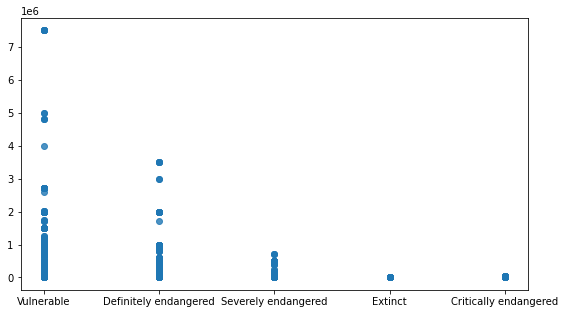

In [57]:
# Plot scatter plot between Number of Speakers and Degree of endangerment
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)

# Replace spaces with underscores
end_lang.columns = end_lang.columns.str.replace(' ', '_');
# Convert Number of speakers back to float
end_lang['Number_of_speakers'] = end_lang['Number_of_speakers'].astype('float64')
#end_lang['Number of speakers'] = end_lang['Number of speakers'].astype(float)
sb.regplot(data = end_lang, x='Degree_of_endangerment', y='Number_of_speakers', truncate=False);
#plt.scatter(data = end_lang, x='Degree of endangerment', y='Number of speakers');
plt.subplot(1,2,2)
sb.regplot(data = end_lang, x='Degree_of_endangerment', y='Number_of_speakers', truncate=False, x_jitter=0.3);


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!